# Model for Diabetes Risk Prediction 

## PIMA Indian Diabetes Dataset 3

 ( Dataset removing missing value rows)

In [885]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [886]:
df = pd.read_csv('Dataset/diabetes.csv')

In [887]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [888]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [890]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Drop columns that cannot be collected by IoT Devices

In [891]:
df.drop(columns=['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction'], inplace=True)

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   BMI            768 non-null    float64
 3   Age            768 non-null    int64  
 4   Outcome        768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

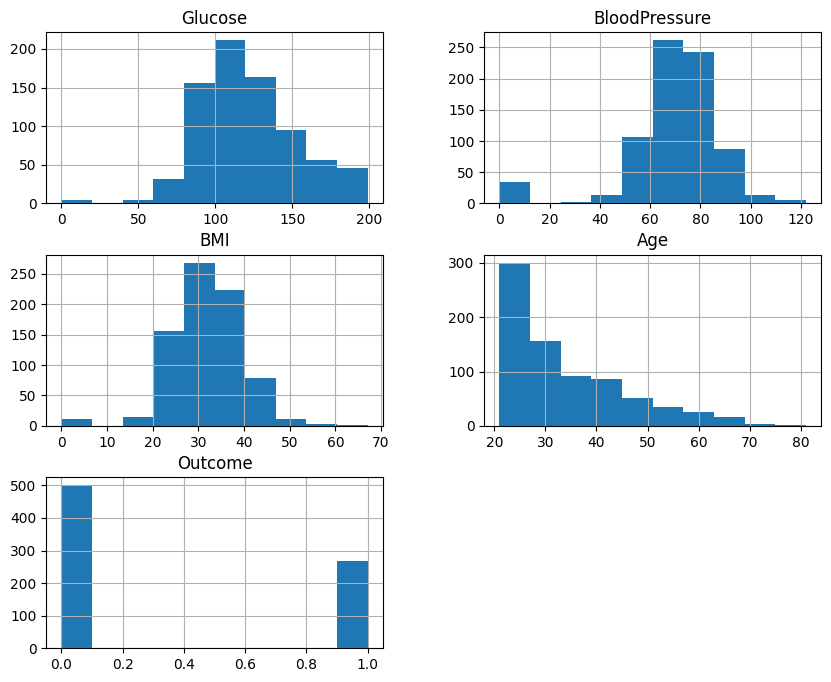

In [893]:
df.hist(bins=10, figsize=(10,8))

In [894]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Replace 'zero' with null

In [895]:
# Copy the first 4 columns
rows_to_impute = df.iloc[:, 0:3].copy()

# Replace zero values with NaN
rows_to_impute.replace(0, np.nan, inplace=True)

# Update df with the processed data
df.iloc[:, 0:3] = rows_to_impute
print(df)

     Glucose  BloodPressure   BMI  Age  Outcome
0      148.0           72.0  33.6   50        1
1       85.0           66.0  26.6   31        0
2      183.0           64.0  23.3   32        1
3       89.0           66.0  28.1   21        0
4      137.0           40.0  43.1   33        1
..       ...            ...   ...  ...      ...
763    101.0           76.0  32.9   63        0
764    122.0           70.0  36.8   27        0
765    121.0           72.0  26.2   30        0
766    126.0           60.0  30.1   47        1
767     93.0           70.0  30.4   23        0

[768 rows x 5 columns]


/var/folders/zq/6xpyjvds7tv_bz1html9bdlw0000gn/T/ipykernel_4762/705721988.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0:3] = rows_to_impute
/var/folders/zq/6xpyjvds7tv_bz1html9bdlw0000gn/T/ipykernel_4762/705721988.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 0:3] = rows_t

Drop row that have null

In [896]:
df.isnull().sum()

Glucose           5
BloodPressure    35
BMI              11
Age               0
Outcome           0
dtype: int64

In [897]:
df = df.dropna()
print(df)

     Glucose  BloodPressure   BMI  Age  Outcome
0      148.0           72.0  33.6   50        1
1       85.0           66.0  26.6   31        0
2      183.0           64.0  23.3   32        1
3       89.0           66.0  28.1   21        0
4      137.0           40.0  43.1   33        1
..       ...            ...   ...  ...      ...
763    101.0           76.0  32.9   63        0
764    122.0           70.0  36.8   27        0
765    121.0           72.0  26.2   30        0
766    126.0           60.0  30.1   47        1
767     93.0           70.0  30.4   23        0

[724 rows x 5 columns]


In [898]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        724 non-null    float64
 1   BloodPressure  724 non-null    float64
 2   BMI            724 non-null    float64
 3   Age            724 non-null    int64  
 4   Outcome        724 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 33.9 KB


In [899]:
df.describe()

,Glucose,BloodPressure,BMI,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000
mean,121.882597,72.400552,32.467127,33.350829,0.343923
std,30.750030,12.379870,6.888941,11.765393,0.475344
min,44.000000,24.000000,18.200000,21.000000,0.000000
25%,99.750000,64.000000,27.500000,24.000000,0.000000
50%,117.000000,72.000000,32.400000,29.000000,0.000000
75%,142.000000,80.000000,36.600000,41.000000,1.000000
max,199.000000,122.000000,67.100000,81.000000,1.000000


Split Data 80:20

In [900]:
x = df.iloc[:,0:4] #select all rows, select columns 0 to 4
y = df['Outcome']

In [901]:
x.head()

,Glucose,BloodPressure,BMI,Age
0,148.0,72.0,33.6,50
1,85.0,66.0,26.6,31
2,183.0,64.0,23.3,32
3,89.0,66.0,28.1,21
4,137.0,40.0,43.1,33


In [902]:
y.sample(5)

579    1
434    0
315    0
216    1
460    0
Name: Outcome, dtype: int64

In [903]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [904]:
X_train.shape

(579, 4)

In [905]:
y_train.shape

(579,)

In [906]:
x_test.shape

(145, 4)

Split data before SMOTE

In [907]:
from imblearn.over_sampling import SMOTE
(X_sample, y_sample) = train_test_split(df, test_size=0.2, stratify = y)

X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
x_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

SMOTE to help imbalance data

In [908]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Feature Scaling (Standardization)

In [909]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train_smote = stand.fit_transform(X_train_smote)
x_test_smote = stand.transform(x_test_smote)

Random Forest

In [910]:
parameters ={
      'criterion' : ['gini', 'entropy'],
      'max_features': ['sqrt'],
      'random_state': range(1, 51, 10),
      'min_samples_leaf': range(1, 51, 10),
      'n_estimators': range(1, 51, 10)}

In [911]:
%%time
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create a RandomForestClassifier object
clf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rf_classifier = GridSearchCV(clf, parameters, cv=kf, scoring='recall',n_jobs=-1 ,error_score='raise')

# Fit the model on training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Get the best estimator from the GridSearch
best_model = rf_classifier.best_estimator_

# Access the best model's cross-validation accuracy
smote_best_score = rf_classifier.best_score_

# Print the best accuracy
print("Best Score (K-Fold CV):", smote_best_score)
print(f"Best Parameters: {rf_classifier.best_params_}")

Best Score (K-Fold CV): 0.8417125645438898
Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 11, 'random_state': 11}
CPU times: user 558 ms, sys: 81.1 ms, total: 639 ms
Wall time: 5.1 s


In [912]:
# Make predictions on the test data
y_pred_smote = best_model.predict(x_test_smote)

In [913]:
cm = confusion_matrix(y_test_smote, y_pred_smote)
smote_accuracy = accuracy_score(y_test_smote, y_pred_smote)
smote_precision = precision_score(y_test_smote, y_pred_smote)
smote_recall = recall_score(y_test_smote, y_pred_smote)
smote_f1 = f1_score(y_test_smote, y_pred_smote)

print(cm)

[[71 24]
 [19 31]]


In [914]:
from sklearn.model_selection import cross_val_score
from statistics import stdev
score = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv=kf, scoring='recall')
smote_avg_score = score.mean()
smote_stdev = stdev(score)

In [915]:
ndf = [(smote_recall, smote_precision, smote_f1, smote_accuracy, smote_avg_score, smote_stdev)]

smote_rf_score = pd.DataFrame(data = ndf, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg CV F1', 'Standard Deviation'])
smote_rf_score.insert(0, 'Random Forest', 'Tuning hyperparameters with SMOTE')
smote_rf_score

,Random Forest,Recall,Precision,F1 Score,Accuracy,Avg CV F1,Standard Deviation
0,Tuning hyperparameters with SMOTE,0.62,0.563636,0.590476,0.703448,0.818844,0.017906


In [916]:
# Get Confidence Scores (Probabilities)
y_prob_smote = best_model.predict_proba(x_test_smote)

# Handle Binary and Multi-class Probabilities
if y_prob_smote.ndim == 2: # Binary classification
    confidence_scores = y_prob_smote[:, 0] # Probability of negative class
elif y_prob_smote.ndim == 1: # Check if it's a 1D array (binary classification, probabilities are directly returned)
    confidence_scores = y_prob_smote
else:  # Multi-class
    confidence_scores = np.max(y_prob_smote, axis=1)  # Max probability (adjust as needed)

# Add Confidence Scores to DataFrame
smote_rf_score['Confidence Scores Class 0'] = confidence_scores.mean() # added to the dataframe, as a mean. If you want individual confidence scores, you will need to create a new dataframe.

print(smote_rf_score)

                       Random Forest  Recall  Precision  F1 Score  Accuracy  \
0  Tuning hyperparameters with SMOTE    0.62   0.563636  0.590476  0.703448   

   Avg CV F1  Standard Deviation  Confidence Scores Class 0  
0   0.818844            0.017906                   0.609404  


In [917]:
results_with_true = np.column_stack((y_test_smote, y_pred_smote, confidence_scores))

print("\nTrue Class | Predicted Class | Confidence Score Class 0")
print("-----------|-----------------|----------------")
for row in results_with_true:
    print(f"{int(row[0])}          | {int(row[1])}               | {row[2]:.4f}")


True Class | Predicted Class | Confidence Score Class 0
-----------|-----------------|----------------
0          | 0               | 1.0000
0          | 0               | 1.0000
0          | 0               | 0.9091
0          | 0               | 0.7273
1          | 1               | 0.4545
0          | 0               | 0.9091
0          | 0               | 0.5455
0          | 0               | 0.6364
0          | 1               | 0.3636
0          | 0               | 1.0000
0          | 0               | 0.6364
0          | 1               | 0.3636
1          | 1               | 0.2727
0          | 0               | 0.5455
1          | 0               | 1.0000
0          | 0               | 0.8182
0          | 1               | 0.2727
0          | 0               | 0.8182
0          | 0               | 0.9091
1          | 0               | 0.6364
0          | 0               | 1.0000
0          | 1               | 0.3636
0          | 0               | 0.5455
0          | 1        

In [918]:
# Calculate quartiles
quartiles = smote_rf_score['Confidence Scores Class 0'].quantile([0.25, 0.5, 0.75])

print("\nQuartiles of Confidence Score Class 0:")
print(quartiles)


Quartiles of Confidence Score Class 0:
0.25    0.609404
0.50    0.609404
0.75    0.609404
Name: Confidence Scores Class 0, dtype: float64


In [919]:
import pandas as pd
import numpy as np

def categorize_predictions(y_pred_smote, confidence_scores):

    risk_categories = []

    for i in range(len(y_pred_smote)):
        if y_pred_smote[i] == 1:    # Class 1
            risk_categories.append('Has Diabetes')
        elif y_pred_smote[i] == 0:  # Class 0
            class0_prob = confidence_scores[i]  # Probability of class 0

            if class0_prob < 0.6:
                risk_categories.append('High Risk')
            elif 0.6 <= class0_prob < 0.9:
                risk_categories.append('Low Risk')
            else:
                risk_categories.append('No Risk')

    return pd.Series(risk_categories)

categorized_predictions = categorize_predictions(y_pred_smote, confidence_scores)

print(categorized_predictions)

0           No Risk
1           No Risk
2           No Risk
3          Low Risk
4      Has Diabetes
           ...     
140    Has Diabetes
141         No Risk
142    Has Diabetes
143         No Risk
144        Low Risk
Length: 145, dtype: object


In [920]:
results_with_true = np.column_stack((y_test_smote, y_pred_smote, confidence_scores, categorized_predictions))

print("\nTrue Class | Predicted Class | Confidence Score Class 0 | Risk")
print("-----------|-----------------|--------------------------|----------------")
for row in results_with_true:
    print(f"{int(row[0])}          | {int(row[1])}               | {row[2]:.4f}                   | {row[3]:}")


True Class | Predicted Class | Confidence Score Class 0 | Risk
-----------|-----------------|--------------------------|----------------
0          | 0               | 1.0000                   | No Risk
0          | 0               | 1.0000                   | No Risk
0          | 0               | 0.9091                   | No Risk
0          | 0               | 0.7273                   | Low Risk
1          | 1               | 0.4545                   | Has Diabetes
0          | 0               | 0.9091                   | No Risk
0          | 0               | 0.5455                   | High Risk
0          | 0               | 0.6364                   | Low Risk
0          | 1               | 0.3636                   | Has Diabetes
0          | 0               | 1.0000                   | No Risk
0          | 0               | 0.6364                   | Low Risk
0          | 1               | 0.3636                   | Has Diabetes
1          | 1               | 0.2727             

In [921]:
# Save the trained model and scaler
import pickle
with open('Model/diabetes_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('Model/diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(stand, f)

In [922]:
test_data = pd.read_csv("Dataset/healthCheckup_diabetes.csv")

In [923]:
with open('Model/diabetes_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('Model/diabetes_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

In [924]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        48 non-null     int64  
 1   BloodPressure  48 non-null     int64  
 2   BMI            48 non-null     float64
 3   Age            48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [929]:
X_new = test_data.copy()

# Scaling
X_new_scaled = loaded_scaler.transform(X_new)

# Prediction and Confidence Scores
y_pred = loaded_model.predict(X_new_scaled)

try:
    y_pred_proba = loaded_model.predict_proba(X_new_scaled)

    # Handle binary and multi-class
    if y_pred_proba.ndim == 2:  # Binary classification
        confidence_scores = y_pred_proba[:,0]  # Probability of negative class
    elif y_pred_proba.ndim == 1: # Check if it's a 1D array (binary classification, probabilities are directly returned)
        confidence_scores = y_pred_proba
    else:  # Multi-class
        confidence_scores = np.max(y_pred_proba, axis=1)  # Max probability (adjust as needed)

except AttributeError:
    print("Model does not have predict_proba.")
    confidence_scores = None

results_data = test_data.copy()
results_data['Predicted_Outcome'] = y_pred
results_data['Confidence_Score'] = confidence_scores

# Print the relevant columns to show the confidence scores
print(results_data[['Predicted_Outcome', 'Confidence_Score']])

    Predicted_Outcome  Confidence_Score
0                   0          0.909091
1                   0          1.000000
2                   0          0.727273
3                   0          1.000000
4                   0          0.636364
5                   0          0.818182
6                   0          1.000000
7                   0          0.727273
8                   0          0.909091
9                   0          1.000000
10                  0          1.000000
11                  0          0.909091
12                  0          0.636364
13                  0          0.545455
14                  0          0.909091
15                  0          0.909091
16                  0          0.727273
17                  1          0.181818
18                  0          0.818182
19                  0          0.818182
20                  1          0.272727
21                  0          1.000000
22                  0          1.000000
23                  0          0.636364


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
